In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('./exp4.rda')

In [5]:
library(dplyr)

In [13]:
head(exp4,2)

,death,TYPE,PH,Gender,race,Age,GSM,NAT2,ADA,CDH2,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,Control,6.97,M,Caucasian,32,GSM2431721,6.918508,5.958536,7.389671,...,8.062601,8.039051,6.266754,4.402844,6.107446,5.091350,7.473668,7.085446,5.301909,5.986224
GSM2431722,0,Control,7.01,F,Caucasian,63,GSM2431722,6.397328,6.113981,7.629390,...,9.066047,8.447141,6.887356,4.383695,5.726334,4.867468,7.710730,7.402328,5.598268,6.171961


In [14]:
exp4 = exp4 %>%  dplyr::filter(Gender == 'M')

In [15]:
dim(exp4)

[1]   190 11882

In [74]:
table(exp4$TYPE)


Control     MDD 
    130      60 

In [16]:
expr = exp4[,8:11882]

colnames(expr) = gsub('-','.',colnames(expr))
expr <- expr[, !grepl("^\\d+", names(expr))]

In [17]:
expr1 = expr%>%  t() %>%  as.data.frame()

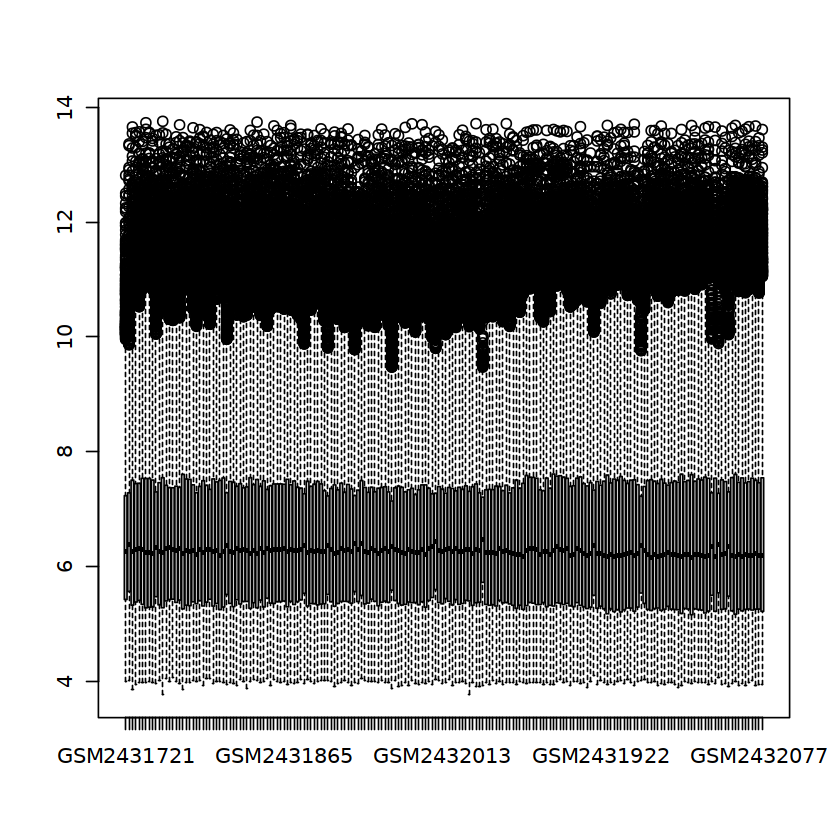

In [18]:
boxplot(expr1)

In [19]:
TYPE = exp4$TYPE

In [20]:
library(limma)
library(dplyr)
f <- TYPE %>% as.factor()

In [21]:
TYPE

[1] "Control" "Control" "Control" "MDD"     "MDD"     "Control" "MDD"    
  [8] "Control" "Control" "Control" "Control" "MDD"     "Control" "MDD"    
 [15] "Control" "MDD"     "Control" "Control" "Control" "Control" "MDD"    
 [22] "Control" "Control" "MDD"     "Control" "Control" "Control" "Control"
 [29] "Control" "Control" "MDD"     "Control" "Control" "Control" "Control"
 [36] "MDD"     "Control" "MDD"     "Control" "MDD"     "MDD"     "MDD"    
 [43] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
 [50] "MDD"     "Control" "MDD"     "MDD"     "Control" "Control" "Control"
 [57] "Control" "Control" "Control" "Control" "Control" "Control" "MDD"    
 [64] "MDD"     "MDD"     "Control" "Control" "Control" "Control" "Control"
 [71] "Control" "MDD"     "Control" "MDD"     "Control" "MDD"     "Control"
 [78] "Control" "Control" "Control" "Control" "MDD"     "Control" "Control"
 [85] "MDD"     "Control" "Control" "Control" "Control" "Control" "Control"
 [92] "MDD"     "Control" "Control" "Control" "Control" "Control" "MDD"    
 [99] "MDD"     "Control" "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[106] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[113] "MDD"     "Control" "MDD"     "MDD"     "Control" "Control" "Control"
[120] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[127] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[134] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[141] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[148] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[155] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[162] "Control" "Control" "Control" "Control" "Control" "MDD"     "MDD"    
[169] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[176] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[183] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[190] "MDD"

In [22]:
desigN <- model.matrix(~ 0 + f)
colnames(desigN) <- levels(f)
fit = lmFit(expr1, desigN)
contrast.matrix <- makeContrasts(MDD - Control, levels = colnames(coef(fit)))
contrast.matrix 

,MDD - Control
Control,-1
MDD,1


In [23]:
fit2 <- contrasts.fit(fit, contrast.matrix) 
fit2 <- eBayes(fit2) 
tempOutput <- topTable(fit2,coef=1,n=Inf,adjust="BH")
head(tempOutput)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADARB2,-0.10498147,5.060784,-4.116157,5.726686e-05,0.2466906,1.4827485
BAIAP3,0.19462973,7.883476,3.998534,9.101598e-05,0.2466906,1.0985581
POU2AF1,-0.08662522,4.838906,-3.983235,9.659804e-05,0.2466906,1.0492613
SMC4,-0.07508198,5.225278,-3.955838,1.074176e-04,0.2466906,0.9613724
IFIT3,-0.17100823,6.618539,-3.894624,1.359031e-04,0.2466906,0.7668219
PIM2,0.22064004,7.682283,3.891127,1.377300e-04,0.2466906,0.7557850


In [73]:
diff[c('HIST1H4C','PRSS3','TUSC3'),]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,change,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
HIST1H4C,0.3305861,8.758395,2.548226,0.0116138291,0.3513480,-2.83566796,Up,HIST1H4C
PRSS3,0.3164814,7.837891,3.623567,0.0003724336,0.2466906,-0.06391849,Up,PRSS3
TUSC3,0.2524366,8.107981,2.373835,0.0185961579,0.3826162,-3.20179250,Up,TUSC3


In [67]:
diff <- 
  tempOutput %>% 
  mutate(change = as.factor(ifelse(P.Value		 < 0.05 & abs(logFC) > 0.25,
                                   ifelse(logFC > 0.25 ,'Up','Down'),'NOT'))) 
diff$gene = rownames(diff)

In [68]:
table(diff$change)


 Down   NOT    Up 
    6 11830    23 

In [69]:
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(cowplot)

In [70]:
top_5 <- bind_rows(   
      diff %>%
        filter(gene  %in% c('CNIH3','OTUD4','MUS81','UCK2')) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      diff %>%
        filter(gene  %in% c()) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )

Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."


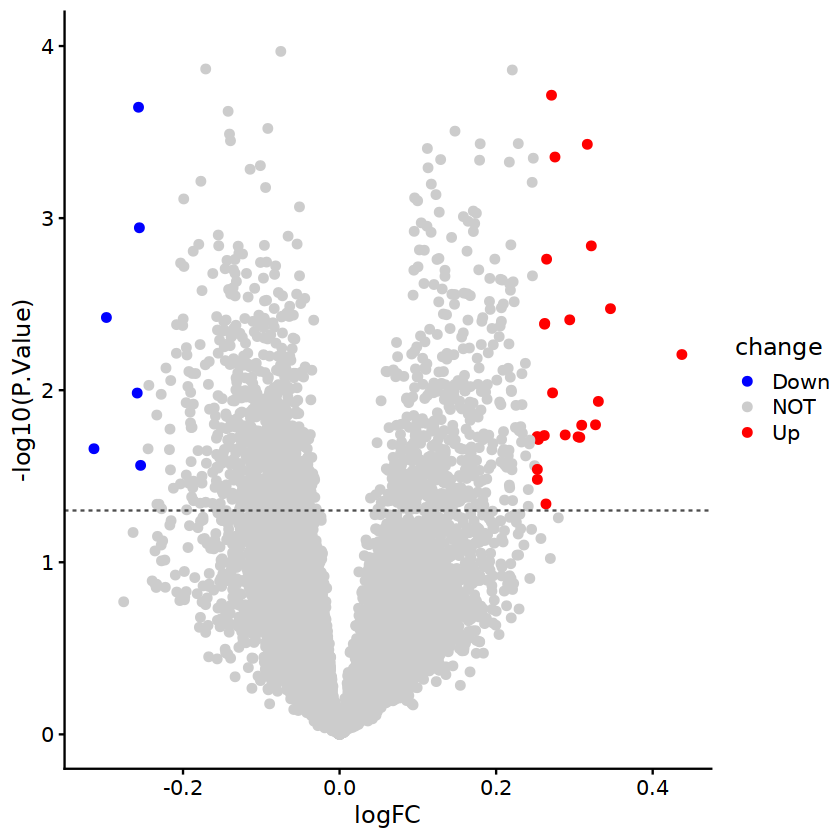

In [76]:
ggplot(data=diff,aes(x=logFC,y=-log10(P.Value)))+
geom_point(aes(color=change),size=2)+
geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
#geom_vline(xintercept = c(-0.3,0.3),linetype="dashed",color="grey30")+
geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
scale_color_manual(values = c("blue","grey80","red"))+
theme_half_open() +ylim(0,4)#+xlim(-1.5,1.5)

In [77]:
tempOutput1 =diff
write.csv(tempOutput1,file = './figure/diffgene2.csv')

In [80]:
ggsave('./figure/fig1.trainset.valcano.pdf',width = 5,height = 5)

Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."


In [83]:
diffgene = tempOutput1 %>%  filter(change != 'NOT') %>% rownames()

In [94]:
exp4 = exp4[ order (exp4$TYPE), ]

In [95]:
forplot = exp4[,diffgene] %>% t() %>% as.data.frame()

In [96]:
library(pheatmap)
#forplot = na.omit(forplot)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

[1]  29 190

In [97]:
library(pheatmap)
annotation_col = data.frame(exp4$TYPE)
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

,GSM2431721,GSM2431726,GSM2431727,GSM2431734,GSM2431737,GSM2431738,GSM2431752,GSM2431753,GSM2431756,GSM2431762,...,GSM2431958,GSM2431959,GSM2431969,GSM2431970,GSM2431995,GSM2432065,GSM2432068,GSM2432070,GSM2432077,GSM2432081
SYT5,-1.325089,-1.6190734,0.8787268,-0.4177901,0.4647577,0.7788378,-1.221551,0.70888385,-0.3604440,-1.732830,...,1.491885,1.222566,0.1478482,0.7754658,1.807571,2.00000,1.4006696,1.216895,1.2776815,1.491762
ATP10B,1.304320,0.9325631,0.3649931,0.6149706,-0.1122067,-1.0134155,2.000000,-0.06057643,0.3578008,1.749023,...,-1.107875,-2.000000,-1.0722032,-0.9342793,-1.556768,-1.24502,-0.9287878,-1.658237,-0.9204056,-2.000000


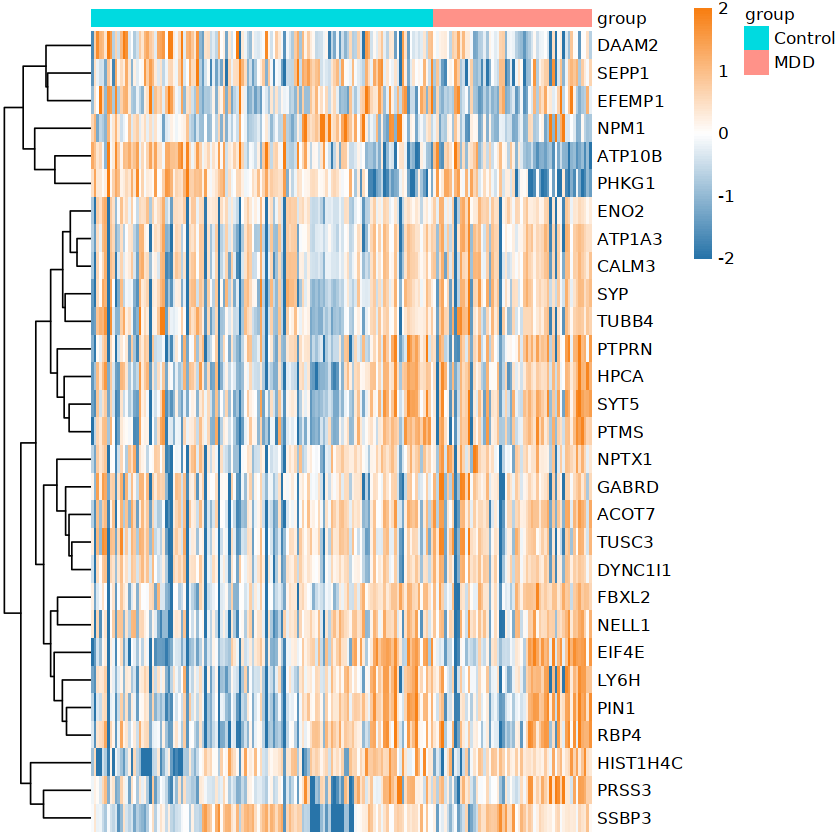

In [99]:
 x  = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         show_rownames=TRUE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [100]:
ggsave('./figure/fig1.trainset.heat.pdf',width = 6,height = 7)

Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."


In [101]:
library(clusterProfiler)
library(org.Hs.eg.db)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [111]:
gene_symbol <- bitr(geneID = diffgene,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "BP",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.5,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = diffgene, fromType = "SYMBOL", toType = c("ENTREZID"), :
"10.34% of input gene IDs are fail to map..."


In [113]:
options(repr.plot.height= 5,repr.plot.width = 8)

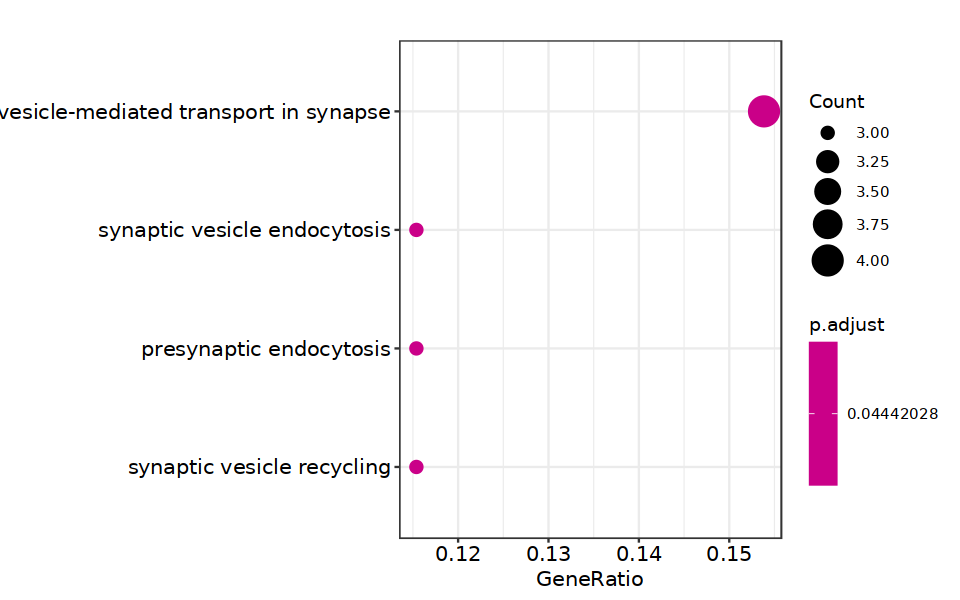

In [114]:
dotplot(BP,showCategory = 10,label_format = 100)

In [115]:
ggsave('./figure/fig1.trainset.GO.pdf',width = 8,height = 5)

In [105]:
gene = gene_symbol$ENTREZID

In [107]:
kk <- enrichKEGG(gene = gene,keyType = "kegg",organism= "human", qvalueCutoff = 0.05, pvalueCutoff=0.05)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



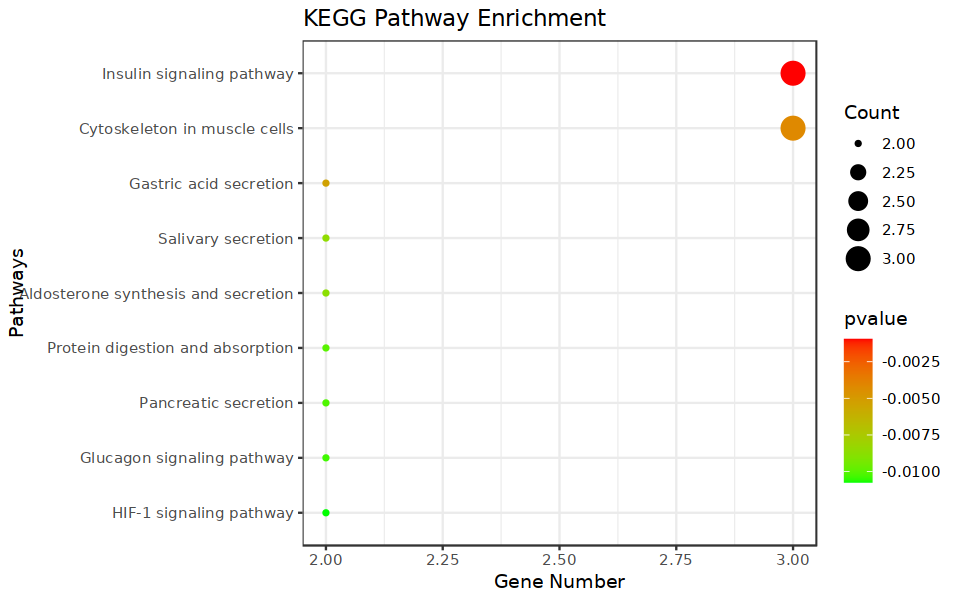

In [116]:
hh <- as.data.frame(kk@result[1:9,])
rownames(hh) <- 1:nrow(hh)
hh$order=factor(rev(as.integer(rownames(hh))),labels = rev(hh$Description))
ggplot(hh,aes(y=order,x=Count))+
geom_point(aes(size=Count,color=-1*pvalue))+# 修改点的大小
scale_color_gradient(low="green",high = "red")+
labs(color=expression(pvalue,size="Count"), 
     x="Gene Number",y="Pathways",title="KEGG Pathway Enrichment")+
theme_bw()

In [117]:
ggsave('./figure/fig1.trainset.kegg.pdf',width = 6,height = 5)